In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns

In [2]:
#Reading the CSV file
healthcare_data = 'Resources/PLACES__Place_Data__GIS_Friendly_Format___2022_release.csv'
healthcare_data_df = pd.read_csv(healthcare_data,low_memory=False)
healthcare_data_df

,StateAbbr,StateDesc,PlaceName,PlaceFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,...,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,AK,Alaska,Akhiok,200650,71,18.6,"(15.2, 22.0)",NaN,NaN,17.1,...,NaN,3.0,"( 2.6, 3.5)",NaN,NaN,21.1,"(12.5, 31.0)",NaN,NaN,POINT (-154.2164038 56.94813508)
1,AK,Alaska,Arctic Village,203990,152,19.0,"(15.4, 23.4)",NaN,NaN,20.5,...,NaN,4.6,"( 4.1, 5.3)",NaN,NaN,31.0,"(19.9, 43.8)",NaN,NaN,POINT (-145.4957035 68.14208719)
2,AK,Alaska,Clark's Point,215430,62,16.6,"(12.7, 21.2)",NaN,NaN,25.7,...,NaN,5.8,"( 4.7, 6.9)",NaN,NaN,33.4,"(16.1, 50.9)",NaN,NaN,POINT (-158.5287354 58.83338907)
3,AK,Alaska,Nelson Lagoon,252940,52,15.8,"(13.0, 19.1)",NaN,NaN,22.7,...,NaN,3.8,"( 3.2, 4.4)",NaN,NaN,19.5,"( 6.1, 37.3)",NaN,NaN,POINT (-161.6293836 55.83796916)
4,AK,Alaska,Pitkas Point,260860,109,22.1,"(18.1, 26.3)",NaN,NaN,26.1,...,NaN,6.0,"( 5.4, 6.6)",NaN,NaN,36.7,"(23.7, 49.7)",NaN,NaN,POINT (-163.2681284 62.03740354)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28479,VA,Virginia,West Falls Church,5184368,29207,17.2,"(16.0, 18.5)",17.1,"(15.9, 18.3)",18.0,...,"(31.8, 32.8)",2.1,"( 2.0, 2.2)",2.3,"( 2.2, 2.4)",8.6,"( 7.3, 10.0)",8.9,"( 7.5, 10.4)",POINT (-77.18784014 38.86483377)
28480,WA,Washington,Nisqually Indian Community,5349193,575,10.6,"( 9.0, 12.3)",11.0,"( 9.3, 12.7)",25.1,...,"(36.5, 39.0)",3.4,"( 3.1, 3.8)",3.4,"( 3.1, 3.7)",15.1,"(10.4, 20.6)",15.5,"(10.7, 21.4)",POINT (-122.6800798 47.02144162)
28481,WV,West Virginia,Mabscott,5449492,1408,12.9,"(11.2, 14.6)",13.8,"(12.0, 15.8)",40.7,...,"(43.0, 45.3)",5.0,"( 4.6, 5.6)",4.2,"( 3.8, 4.5)",29.2,"(23.2, 35.6)",28.9,"(23.0, 35.2)",POINT (-81.21330287 37.76947999)
28482,VA,Virginia,Tangier,5177520,725,10.7,"( 8.1, 13.8)",11.7,"( 8.8, 15.3)",32.7,...,"(31.3, 35.3)",3.8,"( 3.2, 4.4)",2.7,"( 2.4, 3.1)",12.0,"( 7.0, 17.8)",12.0,"( 7.0, 18.2)",POINT (-75.99293935 37.82359247)


In [3]:
healthcare_data_df.columns.values.tolist()

['StateAbbr',
 'StateDesc',
 'PlaceName',
 'PlaceFIPS',
 'TotalPopulation',
 'ACCESS2_CrudePrev',
 'ACCESS2_Crude95CI',
 'ACCESS2_AdjPrev',
 'ACCESS2_Adj95CI',
 'ARTHRITIS_CrudePrev',
 'ARTHRITIS_Crude95CI',
 'ARTHRITIS_AdjPrev',
 'ARTHRITIS_Adj95CI',
 'BINGE_CrudePrev',
 'BINGE_Crude95CI',
 'BINGE_AdjPrev',
 'BINGE_Adj95CI',
 'BPHIGH_CrudePrev',
 'BPHIGH_Crude95CI',
 'BPHIGH_AdjPrev',
 'BPHIGH_Adj95CI',
 'BPMED_CrudePrev',
 'BPMED_Crude95CI',
 'BPMED_AdjPrev',
 'BPMED_Adj95CI',
 'CANCER_CrudePrev',
 'CANCER_Crude95CI',
 'CANCER_AdjPrev',
 'CANCER_Adj95CI',
 'CASTHMA_CrudePrev',
 'CASTHMA_Crude95CI',
 'CASTHMA_AdjPrev',
 'CASTHMA_Adj95CI',
 'CERVICAL_CrudePrev',
 'CERVICAL_Crude95CI',
 'CERVICAL_AdjPrev',
 'CERVICAL_Adj95CI',
 'CHD_CrudePrev',
 'CHD_Crude95CI',
 'CHD_AdjPrev',
 'CHD_Adj95CI',
 'CHECKUP_CrudePrev',
 'CHECKUP_Crude95CI',
 'CHECKUP_AdjPrev',
 'CHECKUP_Adj95CI',
 'CHOLSCREEN_CrudePrev',
 'CHOLSCREEN_Crude95CI',
 'CHOLSCREEN_AdjPrev',
 'CHOLSCREEN_Adj95CI',
 'COLON_SCREEN_C

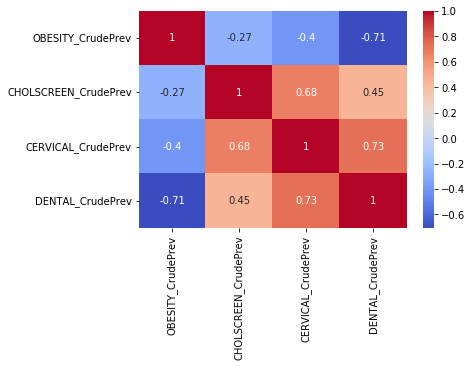

In [4]:
# select the columns you want to use for the heatmap
preventive_care = ['OBESITY_CrudePrev', 'CHOLSCREEN_CrudePrev', 'CERVICAL_CrudePrev', 'DENTAL_CrudePrev']

# create a correlation matrix using the selected columns
corr_matrix = healthcare_data_df[preventive_care].corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the heatmap
plt.show()


In [8]:
df2=healthcare_data_df.query("StateDesc == 'Florida'")
print(df2)

     StateAbbr StateDesc          PlaceName  PlaceFIPS  TotalPopulation  \
63          FL   Florida    Fort Lauderdale    1224000           165528   
64          FL   Florida         Fort White    1224500              568   
65          FL   Florida            Memphis    1244175             8257   
66          FL   Florida      Miami Gardens    1245060           107042   
67          FL   Florida  North Miami Beach    1249475            42521   
...        ...       ...                ...        ...              ...   
5343        FL   Florida      Fisher Island    1222375              126   
5355        FL   Florida         Palm Coast    1254200            75196   
5358        FL   Florida        Indialantic    1233375             2739   
5360        FL   Florida         Belle Isle    1205300             6268   
5365        FL   Florida              Tampa    1271000           335761   

      ACCESS2_CrudePrev ACCESS2_Crude95CI  ACCESS2_AdjPrev ACCESS2_Adj95CI  \
63                 21

In [10]:
df_new = df2[['PlaceName']]
print(df_new)

              PlaceName
63      Fort Lauderdale
64           Fort White
65              Memphis
66        Miami Gardens
67    North Miami Beach
...                 ...
5343      Fisher Island
5355         Palm Coast
5358        Indialantic
5360         Belle Isle
5365              Tampa

[911 rows x 1 columns]


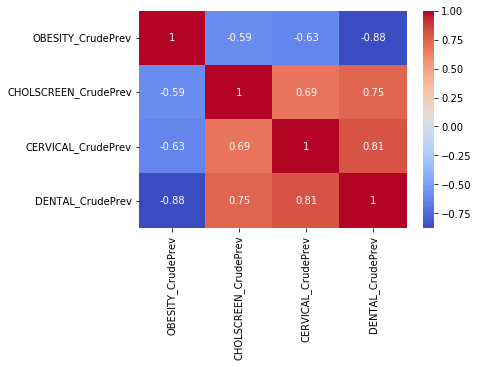

In [9]:
# heat columns for Arizona 
preventive_care = ['OBESITY_CrudePrev', 'CHOLSCREEN_CrudePrev', 'CERVICAL_CrudePrev', 'DENTAL_CrudePrev']
# create a correlation matrix using the selected columns
corr_matrix = df2[preventive_care].corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the heatmap
plt.show()
